In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('spam.csv', encoding='latin1')


In [4]:
#It will show 5 random rows of dataframe
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3143,ham,"Haha I heard that, text me when you're around",NaN,NaN,NaN
2886,ham,K I'll take care of it,NaN,NaN,NaN
818,ham,Then why you not responding,NaN,NaN,NaN
2558,ham,"Some friends want me to drive em someplace, pr...",NaN,NaN,NaN
4923,ham,We can go 4 e normal pilates after our intro...,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

## 1.Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
#drop last three columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [10]:
df.sample(5)

,v1,v2
5442,ham,"I thought i'd get him a watch, just cos thats ..."
2966,ham,NEFT Transaction with reference number &lt;#&...
267,spam,Ur ringtone service has changed! 25 Free credi...
2154,ham,Oh god i am happy to see your message after 3 ...
1485,ham,(I should add that I don't really care and if ...


In [11]:
#rename the columns
df.rename(columns={'v1':'Output','v2':'text'},inplace=True)
df.sample(5)

,Output,text
805,ham,I dled 3d its very imp
669,ham,Did u receive my msg?
5009,ham,"By the way, 'rencontre' is to meet again. Moun..."
3852,ham,"Dont worry, 1 day very big lambu ji vl come..t..."
2256,ham,"Just checked out, heading out to drop off my s..."


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [13]:
df['Output']=encoder.fit_transform(df['Output'])

In [16]:
df.head()

,Output,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
#missing value

In [18]:
df.isnull().sum()

Output    0
text      0
dtype: int64

In [19]:
#check for duplicated value
df.duplicated().sum()

403

In [20]:
df=df.drop_duplicates(keep='first')

In [23]:
print(df.duplicated().sum())
print(df.shape)

0
(5169, 2)


## 2.EDA

In [24]:
df.head()

,Output,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
df['Output'].value_counts()

0    4516
1     653
Name: Output, dtype: int64

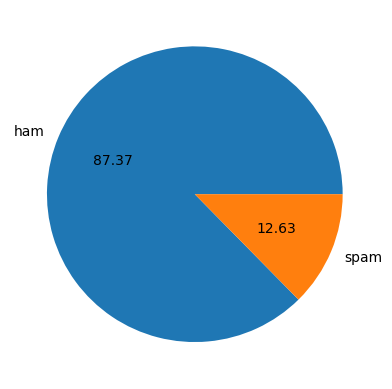

In [29]:
plt.pie(df['Output'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()
#here we get that ham message is more than spam msg.
#Data is imbalance.

In [30]:
import nltk

In [32]:
!pip install nltk

In [33]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\salon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [35]:
df['num_characters']=df['text'].apply(len)

C:\Users\salon\AppData\Local\Temp\ipykernel_14768\399031894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']=df['text'].apply(len)


In [36]:
df.head()

,Output,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [41]:
# number of words
df['word_counts']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\salon\AppData\Local\Temp\ipykernel_14768\3612561824.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_counts']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [42]:
df.head()

,Output,text,num_characters,word_counts
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [43]:
df['sentence_counts']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\salon\AppData\Local\Temp\ipykernel_14768\1797424847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence_counts']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [44]:
df.head()

,Output,text,num_characters,word_counts,sentence_counts
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [45]:
df.describe()

,Output,num_characters,word_counts,sentence_counts
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [46]:
df[df['Output']==0].describe() #ham 

,Output,num_characters,word_counts,sentence_counts
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [47]:
df[df['Output']==1].describe() #sapm

,Output,num_characters,word_counts,sentence_counts
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

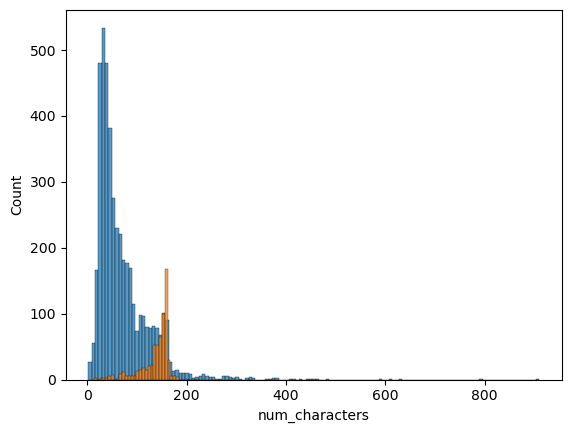

In [50]:
sns.histplot(df[df['Output']==0]['num_characters'])
sns.histplot(df[df['Output']==1]['num_characters'])

<Axes: xlabel='word_counts', ylabel='Count'>

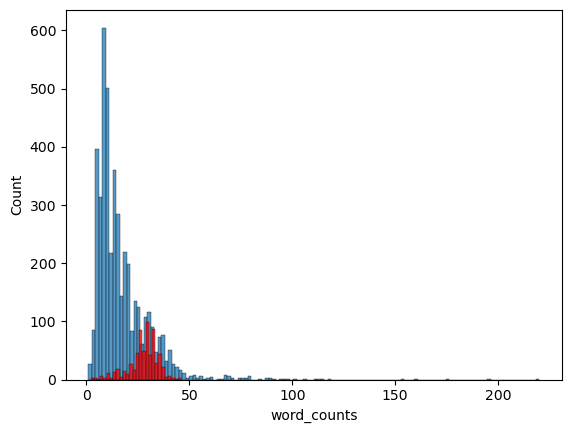

In [52]:
sns.histplot(df[df['Output']==0]['word_counts'])
sns.histplot(df[df['Output']==1]['word_counts'],color='red')

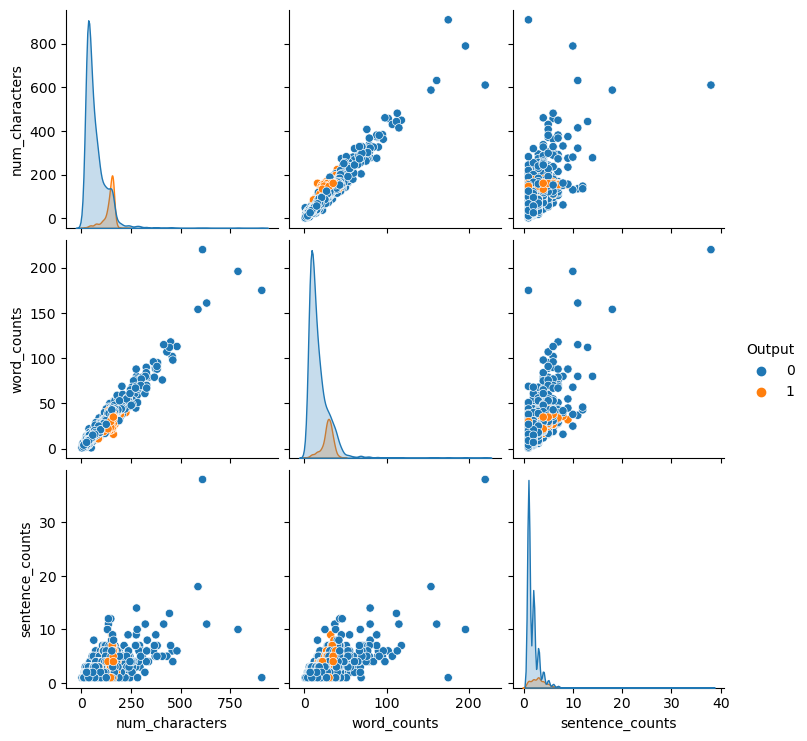

In [54]:
sns.pairplot(df,hue='Output')

C:\Users\salon\AppData\Local\Temp\ipykernel_14768\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

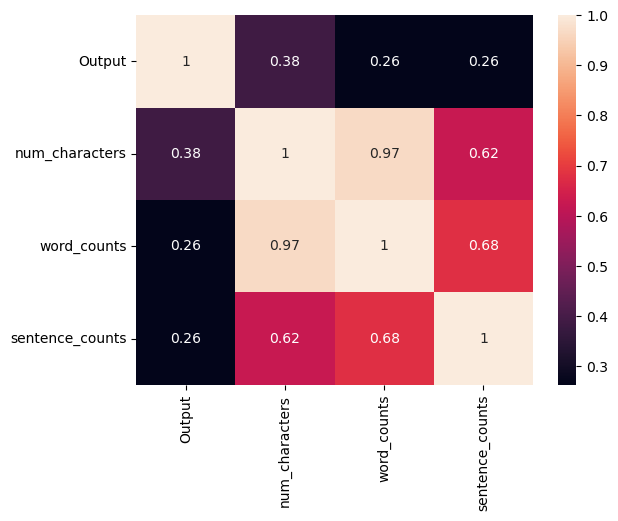

In [57]:
sns.heatmap(df.corr(),annot=True)

## 3.Preprocessing

In [81]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer


def transform_text(text):
    
    # convert into lower case.
    text=text.lower()
    
    # tokenize into words.
    text=nltk.word_tokenize(text)
    y=[]
    
    # remove the special character.
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [83]:
transform_text('I love the youtube lectures on machine learning How about you')

'love youtub lectur machin learn'

In [71]:
from nltk.corpus import stopwords

# Download the stopwords dataset if you haven't already
nltk.download('stopwords')

# Get the list of English stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\salon\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [72]:
# stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [73]:
# import string
# string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [80]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('dancing')

'danc'

In [84]:
df['transformed_text']=df['text'].apply(transform_text)

C:\Users\salon\AppData\Local\Temp\ipykernel_14768\4139466366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text']=df['text'].apply(transform_text)


In [89]:
df.head()

,Output,text,num_characters,word_counts,sentence_counts,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [90]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/34/ac/72a4e42e76bf549dfd91791a6b10a9832f046c1d48b5e778be9ec012aa47/wordcloud-1.9.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/151.4 kB ? eta -:--:--
   -------- ------------------------------- 30.7/151.4 kB 1.4 MB/s eta 0:00:01
   ------------------------------------- -- 143.4/151.4 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 151.4/151.4 kB 1.5 MB/s eta 0:00:00


In [95]:
from wordcloud import WordCloud

# Create a WordCloud object with keyword arguments
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')


In [96]:
spam_wc=wc.generate(df[df['Output']==1]['transformed_text'].str.cat(sep=" "))

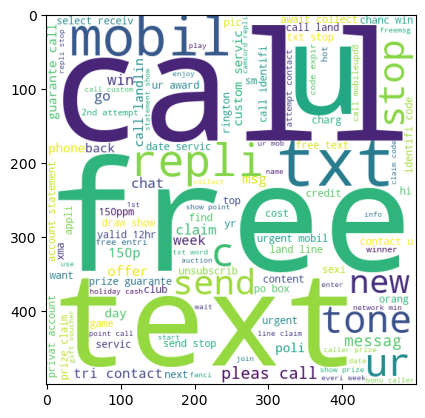

In [97]:
plt.imshow(spam_wc)

In [98]:
ham_wc=wc.generate(df[df['Output']==0]['transformed_text'].str.cat(sep=" "))

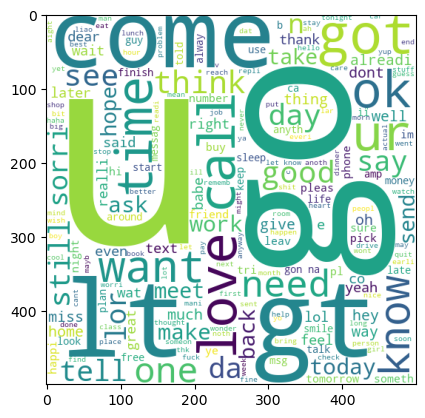

In [99]:
plt.imshow(ham_wc)

In [104]:
spam_corpus=[]
for msg in df[df['Output']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [105]:
len(spam_corpus)

9939

In [106]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

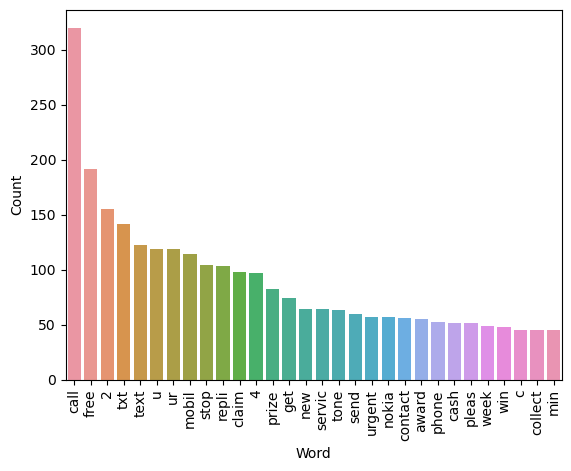

In [112]:
word_counts = Counter(spam_corpus)

# Create a DataFrame from the most common 30 words and their counts
common_words_df = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Count'])

# Create a barplot using Seaborn
sns.barplot(x='Word', y='Count', data=common_words_df)
plt.xticks(rotation='vertical')
plt.show()

## 4.Model Building

In [142]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [143]:
# x=cv.fit_transform(df['transformed_text']).toarray()
x=tfidf.fit_transform(df['transformed_text']).toarray()

In [144]:
x.shape

(5169, 6708)

In [145]:
y=df['Output'].values

In [146]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [147]:
from sklearn.model_selection import train_test_split

In [148]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)


In [149]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [150]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [151]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [152]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [153]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [154]:
# here we have used tfidf and mnb algorithm for our model training as precision score matter more in the case of spam detector.

In [155]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))